In [305]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Data Collecting & Cleaning

### Import Data

In [223]:
audi = pd.read_csv('./data/audi.csv')

In [224]:
bmw = pd.read_csv('./data/bmw.csv')

In [225]:
ford = pd.read_csv('./data/ford.csv')

In [226]:
hyundai = pd.read_csv('./data/hyundi.csv')

In [227]:
merc = pd.read_csv('./data/merc.csv')

In [228]:
skoda = pd.read_csv('./data/skoda.csv')

In [229]:
toyota = pd.read_csv('./data/toyota.csv')

In [230]:
vauxhall = pd.read_csv('./data/vauxhall.csv')

In [231]:
vw = pd.read_csv('./data/vw.csv')

### Add the brand name as a new column

In [232]:
audi['brand'] = 'audi'

In [233]:
bmw['brand'] = 'bmw'

In [234]:
ford['brand'] = 'ford'

In [235]:
hyundai['brand'] = 'hyundai'

In [236]:
merc['brand'] = 'mercedes'

In [237]:
skoda['brand'] = 'skoda'

In [238]:
toyota['brand'] = 'toyota'

In [239]:
vauxhall['brand'] = 'vauxhall'

In [240]:
vw['brand'] = 'vw'

In [241]:
# rename the tax column in hyundai
hyundai = hyundai.rename(columns = {'tax(£)': 'tax'})

### Combine 9 datasets in one file

In [242]:
df = pd.concat([audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw])

In [243]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [244]:
df.shape

(99187, 10)

In [245]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
15152   Eos  2012   5990       Manual    74000   Diesel  125  58.9   
15153   Fox  2008   1799       Manual    88102   Petrol  145  46.3   
15154   Fox  2009   1590       Manual    70000   Petrol  200  42.0   
15155   Fox  2006   1250       Manual    82704   Petrol  150  46.3   
15156   Fox  2007   2295       Manual    74000   Petrol  145  46.3   

       engineSize brand  
0             1.4  audi  
1             2.0  audi  
2             1.4  audi  
3           

In [246]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

In [333]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
brand            object
dtype: object

In [247]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [248]:
# drop a cell which contains the wrong year
df = df[df['year'] != 2060]

In [249]:
# drop the very old car
df = df[df['year'] != 1970]

In [29]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99184.000000,99184.000000,99184.000000,99184.000000,99184.000000,99184.000000
mean,2017.088240,16805.432620,23058.541297,120.296318,55.167242,1.663303
std,2.109018,9866.813678,21148.535002,63.148078,16.138586,0.557628
min,1996.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7424.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32337.250000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [30]:
# save the combined dataset in a new file
df.to_csv('data/combined_used_car.csv')

# EDA

In [31]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


### Heatmap

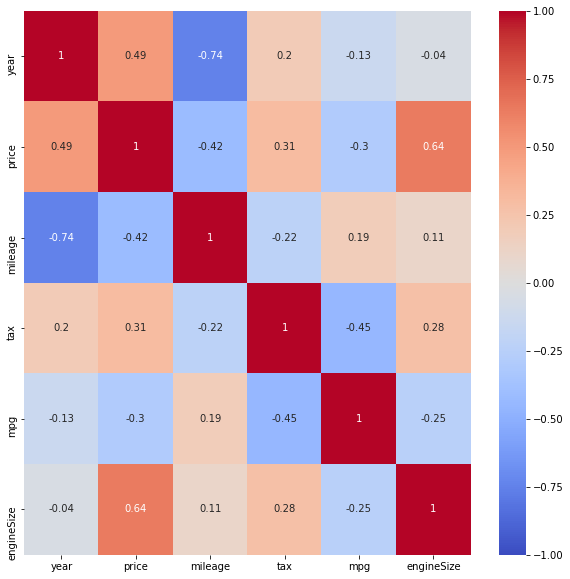

In [335]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.savefig('./visuals/heatmap.png', bbox_inches='tight');

### Visualization

In [33]:
# Distribution of features
def plt_hist(feature):
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title("{} distribution".format(feature))
    plt.show()

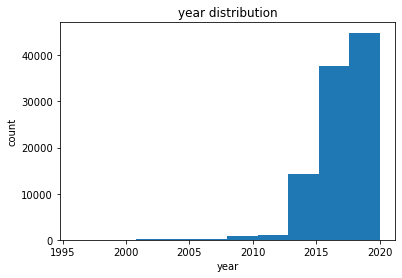

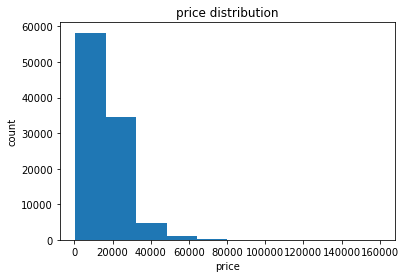

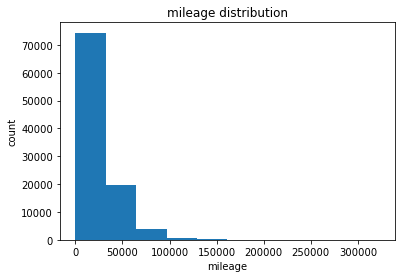

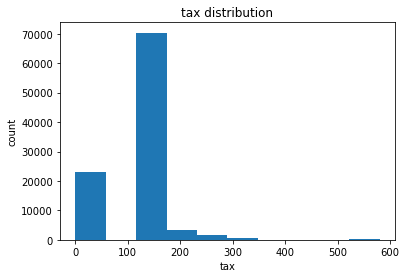

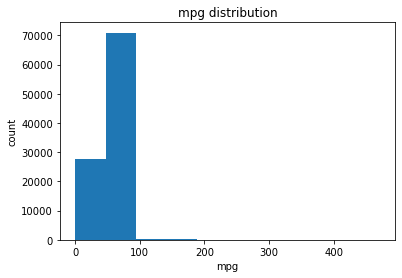

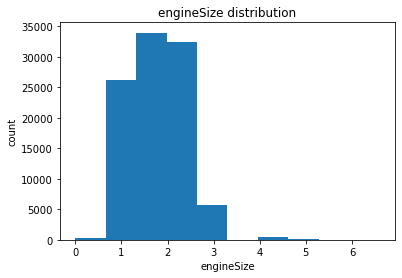

In [34]:
features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

for n in features:
    plt_hist(n)

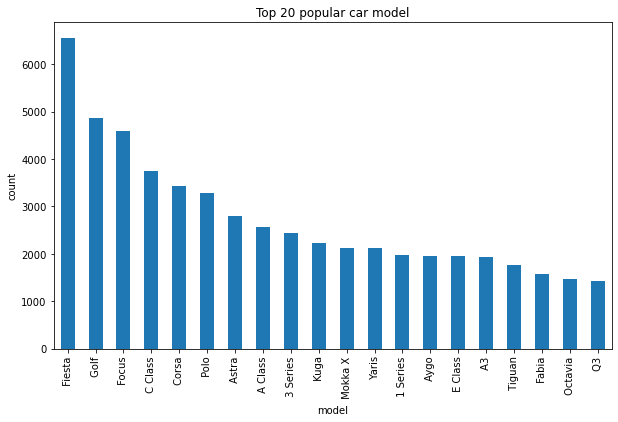

In [336]:
# Top 20 popular car model
model_count = df['model'].value_counts(ascending=False)[:20]
model_count.plot(kind='bar', title='Top 20 popular car model', figsize=(10, 6))
plt.xlabel('model', fontsize=10)
plt.ylabel('count', fontsize=10)
plt.savefig('./visuals/top20_model', bbox_inches='tight');

In [347]:
df['model'].value_counts(ascending=False)[:20]

 Fiesta      6556
 Golf        4863
 Focus       4588
 C Class     3747
 Corsa       3441
 Polo        3287
 Astra       2805
 A Class     2561
 3 Series    2443
 Kuga        2225
 Mokka X     2127
 Yaris       2122
 1 Series    1969
 Aygo        1961
 E Class     1953
 A3          1929
 Tiguan      1765
 Fabia       1571
 Octavia     1477
 Q3          1417
Name: model, dtype: int64

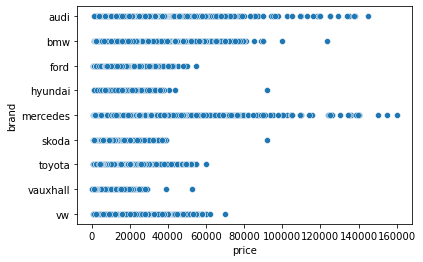

In [36]:
sns.scatterplot(x = "price", y = "brand", data = df);

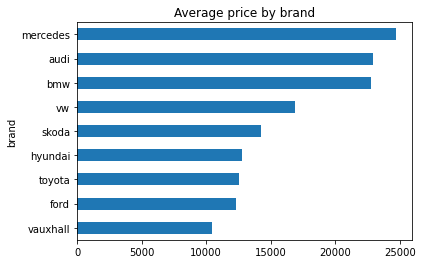

In [348]:
# Average price by brand
price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=True)

price_brand.plot(kind='barh', title='Average price by brand')
plt.savefig('./visuals/avg_price', bbox_inches='tight');

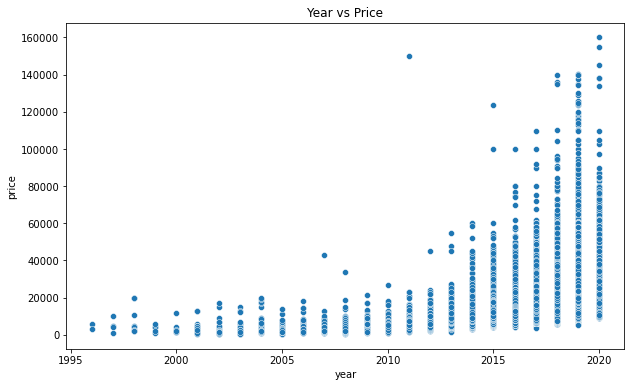

In [338]:
# Year VS Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Year vs Price')
plt.savefig('./visuals/year_price.png', bbox_inches='tight');

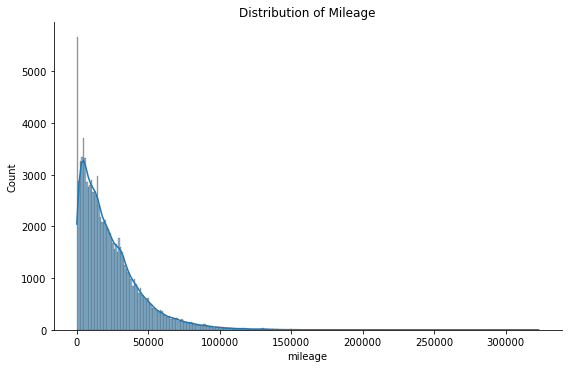

In [39]:
# Distribution of Mileage
sns.displot(data=df,x='mileage',kde=True, height=5, aspect=8/5)
plt.title("Distribution of Mileage");

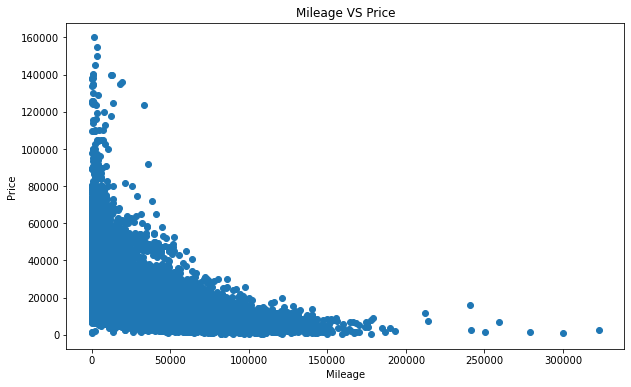

In [339]:
# Mileage VS Price
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'])
plt.title('Mileage VS Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.savefig('./visuals/mileage_price.png', bbox_inches='tight');

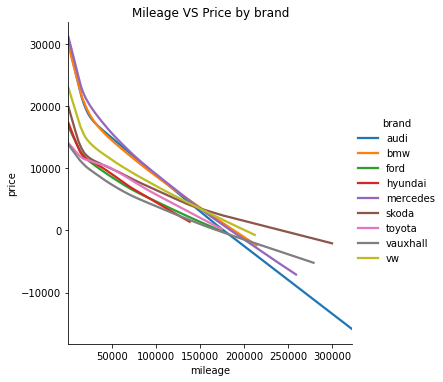

In [340]:
# Mileage VS Price by brand
sns.lmplot(x="mileage", y="price", hue="brand", scatter=False, lowess=True, ci=None, data=df)
plt.title('Mileage VS Price by brand')
plt.savefig('./visuals/mileage_price_brand.png', bbox_inches='tight');

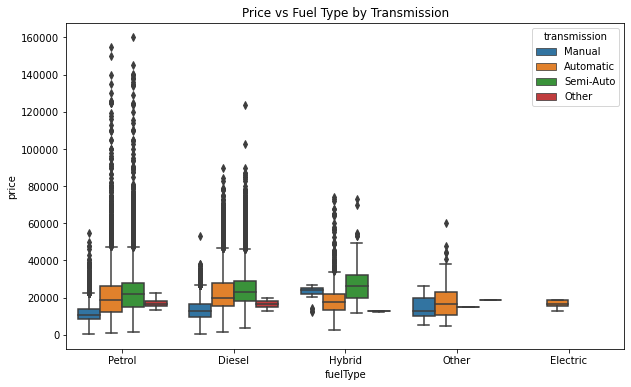

In [341]:
# Price vs Fueltype by Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df, hue='transmission')
plt.title('Price vs Fuel Type by Transmission')
plt.savefig('./visuals/price_fueltype.png', bbox_inches='tight');

### Mercedes

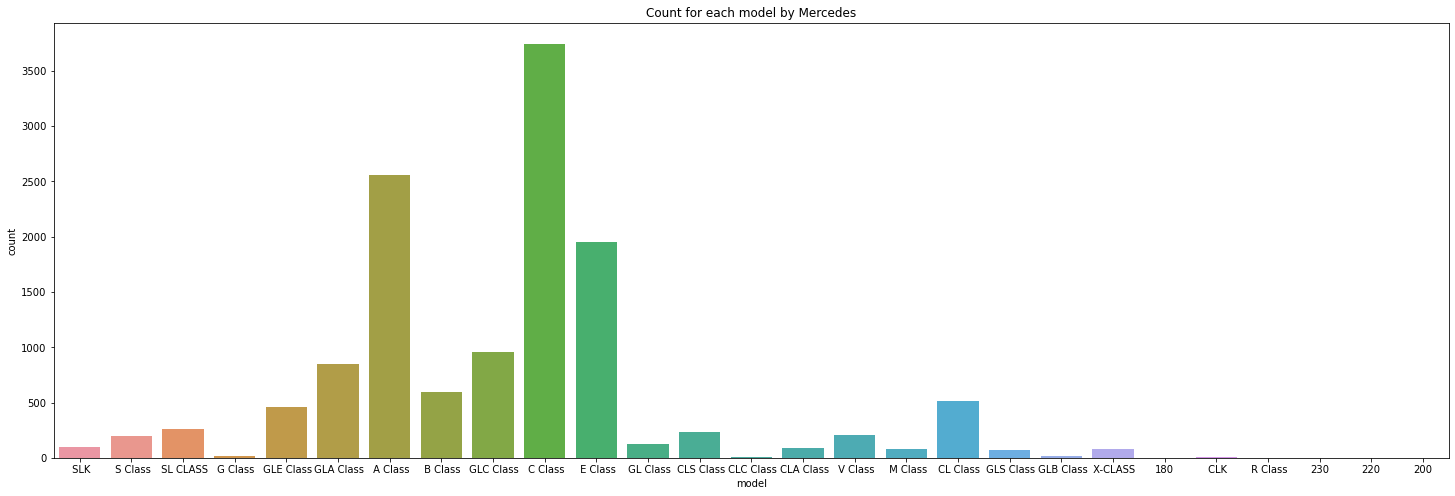

In [343]:
# Count Mercedes models
plt.figure(figsize=(25, 8))
sns.countplot(data=merc, x='model')
plt.title("Count for each model by Mercedes")
plt.savefig('./visuals/count_merc_model', bbox_inches='tight');

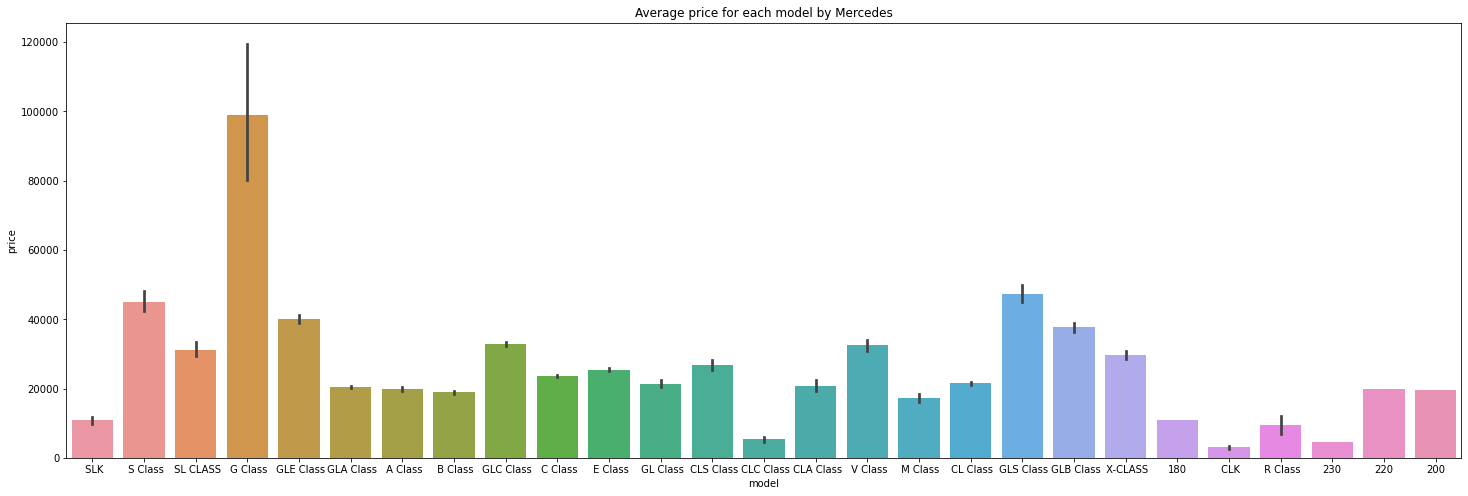

In [344]:
# Average price by Mercedes
plt.figure(figsize=(25,8))
sns.barplot(data=merc,x='model',y='price')
plt.title("Average price for each model by Mercedes")
plt.savefig('./visuals/avg_price_merc.png', bbox_inches='tight');

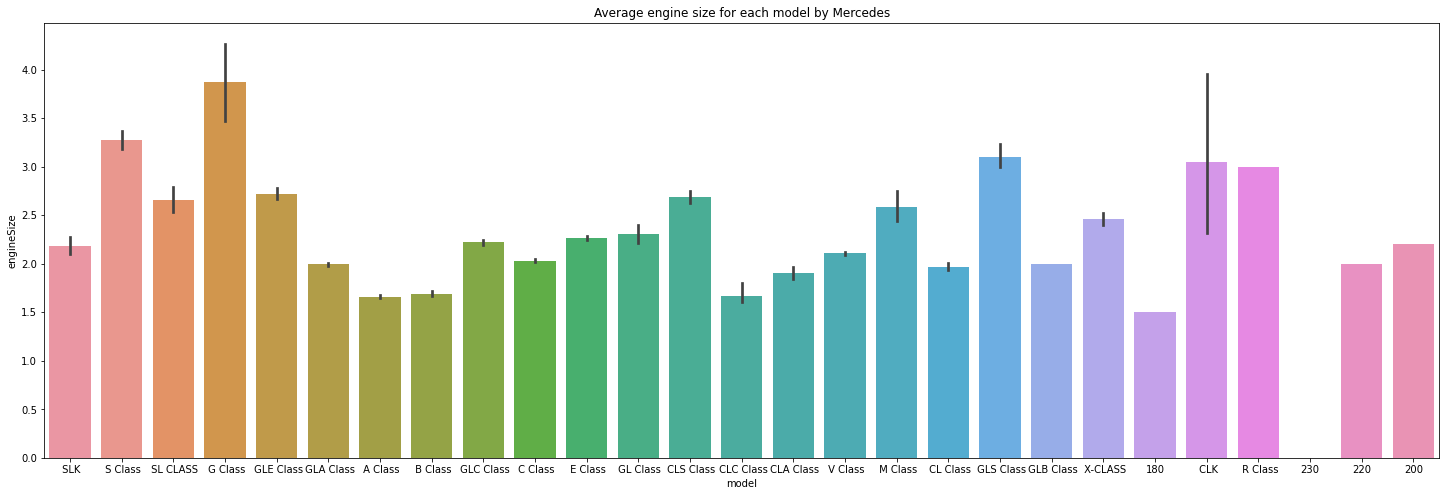

In [345]:
# Average engine size by Mercedes
plt.figure(figsize=(25,8))
sns.barplot(data=merc,x='model',y='engineSize')
plt.title("Average engine size for each model by Mercedes")
plt.savefig('./visuals/avg_engine_merc.png', bbox_inches='tight');

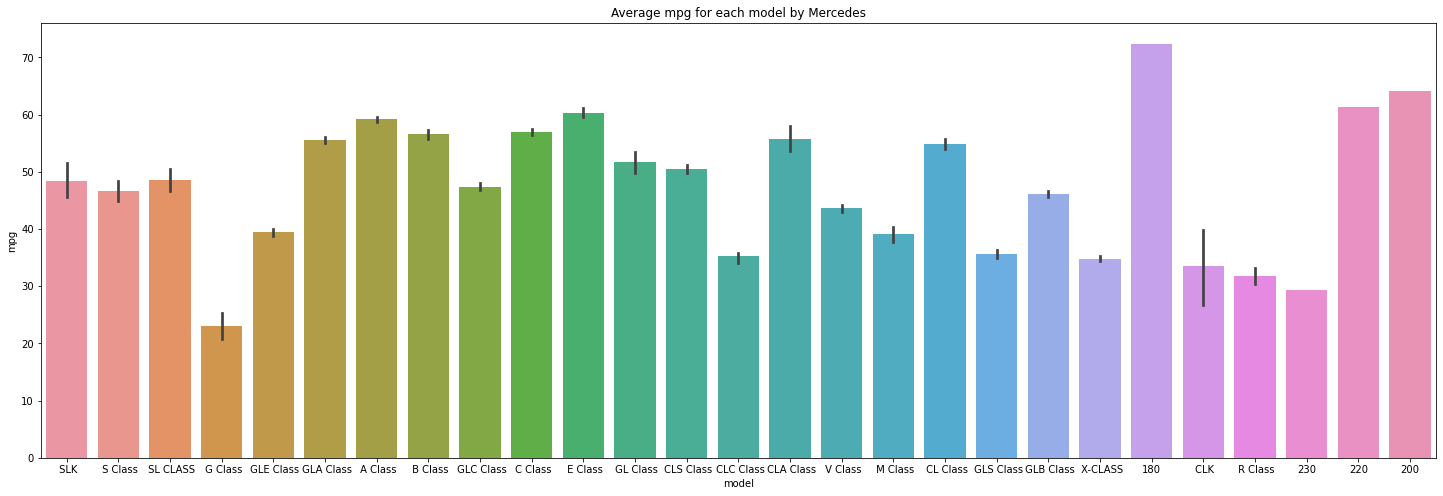

In [342]:
# Average mpg by Mercedes
plt.figure(figsize=(25,8))
sns.barplot(data=merc,x='model',y='mpg')
plt.title("Average mpg for each model by Mercedes")
plt.savefig('./visuals/mpg_merc', bbox_inches='tight');

# Modeling

## Linear Regression

In [250]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [251]:
X = df[features]
y = df['price']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [253]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [254]:
lr.score(X_train, y_train), lr.score(X_test, y_test), cross_val_score(lr, X_train, y_train).mean()

(0.70369469004833, 0.7035572615432006, 0.7034080396880296)

In [256]:
pred_lr = lr.predict(X_test)

In [258]:
metrics.mean_squared_error(y_test, pred_lr)

28440929.170237713

### Dummies

In [262]:
df_dummies = pd.get_dummies(data=df, drop_first=True)

In [263]:
df_dummies.head()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Other,fuelType_Petrol,brand_bmw,brand_ford,brand_hyundai,brand_mercedes,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [264]:
X = df_dummies.drop(columns=['price'])
y = df_dummies['price']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [266]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [267]:
lr.score(X_train, y_train), lr.score(X_test, y_test), cross_val_score(lr, X_train, y_train).mean()

(0.8613845312088818, 0.8630927746948811, 0.8593098451858834)

### Ridge

In [268]:
ridge = Ridge(alpha=0.10)

In [269]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [270]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8613815830854171, 0.8630766443052158)

In [271]:
alphas = np.logspace(0, 5, 100)

In [272]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

In [273]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [66]:
ridge_cv.score(X_train, y_train), ridge_cv.score(X_test, y_test), cross_val_score(ridge, X_train, y_train).mean()

(0.861194891078764, 0.8627689585357923, 0.8593091632973688)

### Lasso

In [67]:
lasso = LassoCV(alphas=alphas, cv=5)

In [68]:
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [69]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test), cross_val_score(lasso, X_train, y_train).mean()

(0.8586913358871929, 0.8599805832355958, 0.8566935486973559)

### Decision Tree

In [70]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [71]:
tree.score(X_train, y_train), tree.score(X_test, y_test), cross_val_score(tree, X_train, y_train).mean()

(0.9995637531031534, 0.9409621799708593, 0.930088182338143)

In [76]:
# GridSearch
params = {'max_depth': [10,20,50],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [1,3,5]}
gs_tree = GridSearchCV(tree, param_grid=params)
gs_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]})

In [85]:
print(gs_tree.best_score_)
gs_tree.best_params_

0.9386082000912831


{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}

### Random Forest Model

In [86]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
rf.score(X_train, y_train), rf.score(X_test, y_test), cross_val_score(rf, X_train, y_train).mean()

(0.9940472281855601, 0.9608858531759864, 0.9583617322143659)

### Adaboost Model

In [90]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [91]:
ada.score(X_train, y_train), ada.score(X_test, y_test), cross_val_score(ada, X_train, y_train).mean()

(0.22816789116806557, 0.20054092815282365, 0.28099282374468676)

## Classification

We selected two models (Mercedes C Class & Ford Focus) to make a classifier for a ford or Mercedes car.

In [277]:
cclass = pd.read_csv('./data/cclass.csv')

In [278]:
focus = pd.read_csv('./data/focus.csv')

In [279]:
df2 = pd.concat([cclass, focus])
df2.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [280]:
df2['model'] = df2['model'].map({' C Class': 0, ' Focus': 1})

In [281]:
df2_dummies = pd.get_dummies(data=df2, drop_first=True)

In [282]:
X = df2_dummies.drop(columns = 'model')
y = df2_dummies['model']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Logistic Regression

In [284]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [285]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test), cross_val_score(logreg, X_train, y_train).mean()

(0.9033361847733106, 0.8961094484822574, 0.9136003652251189)

In [286]:
pred_log = logreg.predict(X_test)

In [287]:
metrics.f1_score(y_test, pred_log)

0.9127468581687612

In [316]:
pipe = Pipeline([
    ('model', LogisticRegression(max_iter=50_000))
])

In [321]:
params = {
    'model__penalty': ['l2'],
    'model__C': [0.001,0.01,0.1,1,10,100],
    'model__class_weight': ['balanced', None]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.913742916900101


{'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l2'}

### KNN

In [288]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [289]:
knn.score(X_train, y_train), knn.score(X_test, y_test), cross_val_score(knn, X_train, y_train).mean()

(0.9309951525520388, 0.9080803762291577, 0.9060446180642053)

In [290]:
pred_knn = knn.predict(X_test)

In [291]:
metrics.f1_score(y_test, pred_knn)

0.9223546406644998

In [322]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [26],
    'knn__metric': ['manhattan'],
    'knn__weights': ['uniform'],
}

knn_gs = GridSearchCV(knn_pipe, param_grid=knn_params)
knn_gs.fit(X_train, y_train)
print(knn_gs.best_score_)
knn_gs.best_params_

0.9693473227839672


{'knn__metric': 'manhattan', 'knn__n_neighbors': 26, 'knn__weights': 'uniform'}

### Decision Tree

In [292]:
tree2 = DecisionTreeClassifier()
tree2.fit(X_train, y_train)

DecisionTreeClassifier()

In [293]:
tree2.score(X_train, y_train), tree2.score(X_test, y_test), cross_val_score(tree2, X_train, y_train).mean()

(1.0, 0.9893116716545532, 0.987453927440994)

In [294]:
pred_tree2 = tree2.predict(X_test)

In [295]:
metrics.f1_score(y_test, pred_tree2)

0.9908792411528639

In [326]:
pipe = Pipeline([
    ('model', DecisionTreeClassifier())
])
params = {
    'model__max_depth': [10,20,50],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1,3,5]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9881667874932765


{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5}

### Random Forest

In [296]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

RandomForestClassifier()

In [297]:
rf2.score(X_train, y_train), rf2.score(X_test, y_test), cross_val_score(rf2, X_train, y_train).mean()

(1.0, 0.9923044035912784, 0.9897350592728238)

In [298]:
pred_rf2 = rf2.predict(X_test)

In [299]:
metrics.f1_score(y_test, pred_rf2)

0.9934640522875816

In [328]:
pipe = Pipeline([
    ('model', RandomForestClassifier())
])
params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [30, 40, 50],
    'model__min_samples_leaf': [1, 3],
    'model__min_samples_split': [3, 5] 
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9905906743548316


{'model__max_depth': 50,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 3,
 'model__n_estimators': 200}

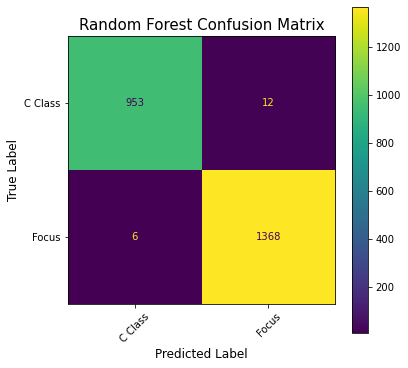

In [346]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(rf2, X_test, y_test, display_labels=['C Class', 'Focus'], ax=ax)
plt.xticks(rotation=45)
plt.title('Random Forest Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12)
plt.savefig('./visuals/rf_matrix.png', bbox_inches='tight');

### AdaBoost

In [300]:
ada2 = AdaBoostClassifier()
ada2.fit(X_train, y_train)

AdaBoostClassifier()

In [301]:
ada2.score(X_train, y_train), ada2.score(X_test, y_test), cross_val_score(ada2, X_train, y_train).mean()

(0.9827487881380097, 0.9790508764429243, 0.9801817584694709)

In [302]:
pred_ada2 = ada2.predict(X_test)

In [303]:
metrics.f1_score(y_test, pred_ada2)

0.9822784810126582

In [329]:
pipe = Pipeline([
    ('model', AdaBoostClassifier())
])
params = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.5, 1]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9843171805271564


{'model__learning_rate': 1, 'model__n_estimators': 200}

### Support Vector Classifier

In [306]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [307]:
svc.score(X_train, y_train), svc.score(X_test, y_test), cross_val_score(svc, X_train, y_train).mean()

(0.9083262047333903, 0.9059427105600684, 0.9066160448925931)

In [308]:
pred_svc = svc.predict(X_test)

In [309]:
metrics.f1_score(y_test, pred_svc)

0.9202898550724637

In [330]:
pipe = Pipeline([
    ('model', SVC())
])
params = {
    'model__C': [1, 3, 5],
    'model__degree': [1, 3, 5]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9077565599698222


{'model__C': 5, 'model__degree': 1}